# Lab work #3 Using simple classification methods for solving classification problem
# First Name, Last Name
# Group No

# Task:
1. Do data preprocessing & data visualization as it was in the 1st lab work
2. Solve classification problem for the selected dataset.
3. Use `examples/fisher_irises.ipynb` as baseline for your experiments
4. Try to optimize hyperparameters of some model

# Datasets for classification
1. [Mushroom Classification](https://www.kaggle.com/datasets/uciml/mushroom-classification)
2. [Fetal Health Classification](https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification)
3. [Glass Classification](https://www.kaggle.com/datasets/uciml/glass)
4. [Gender Classification Dataset](https://www.kaggle.com/datasets/elakiricoder/gender-classification-dataset)
5. [Weather Type Classification](https://www.kaggle.com/datasets/nikhil7280/weather-type-classification)
6. [Star Type Classification / NASA](https://www.kaggle.com/datasets/brsdincer/star-type-classification)
7. [Happiness Classification Dataset](https://www.kaggle.com/datasets/priyanshusethi/happiness-classification-dataset)
8. [NASA: Asteroids Classification
Data Collected from NASA API](https://www.kaggle.com/datasets/shrutimehta/nasa-asteroids-classification)
9. [CS:GO Round Winner Classification](https://www.kaggle.com/datasets/christianlillelund/csgo-round-winner-classification)
10. [Heart Disease Classification Dataset](https://www.kaggle.com/datasets/bharath011/heart-disease-classification-dataset)
11. [Early Classification of Diabetes](https://www.kaggle.com/datasets/andrewmvd/early-diabetes-classification)
12. [Credit Risk Classification Dataset](https://www.kaggle.com/datasets/praveengovi/credit-risk-classification-dataset)

# Dataset: 7. [Happiness Classification Dataset](https://www.kaggle.com/datasets/priyanshusethi/happiness-classification-dataset)

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve)
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

In [46]:
df = pd.read_csv('happydata.csv')

# Initial inspection
df.head(), df.info(), df.isnull().sum(), df.duplicated().sum(), df.mean(), df.std()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   infoavail      143 non-null    int64
 1   housecost      143 non-null    int64
 2   schoolquality  143 non-null    int64
 3   policetrust    143 non-null    int64
 4   streetquality  143 non-null    int64
 5   events         143 non-null    int64
 6   happy          143 non-null    int64
dtypes: int64(7)
memory usage: 7.9 KB


(   infoavail  housecost  schoolquality  policetrust  streetquality  events  \
 0          3          3              3            4              2       4   
 1          3          2              3            5              4       3   
 2          5          3              3            3              3       5   
 3          5          4              3            3              3       5   
 4          5          4              3            3              3       5   
 
    happy  
 0      0  
 1      0  
 2      1  
 3      0  
 4      0  ,
 None,
 infoavail        0
 housecost        0
 schoolquality    0
 policetrust      0
 streetquality    0
 events           0
 happy            0
 dtype: int64,
 18,
 infoavail        4.314685
 housecost        2.538462
 schoolquality    3.265734
 policetrust      3.699301
 streetquality    3.615385
 events           4.216783
 happy            0.538462
 dtype: float64,
 infoavail        0.799820
 housecost        1.118155
 schoolquality    0.9925

A feeling of happiness while self introspecting is the major reason we indulge in our hobbies and choose places to live.

This Dataset is based on a survey conducted where people rated different metrics of their city on a scale of 5 and answered if they are happy or unhappy.

The goal of this dataset is to understand the important factors that play a role in making the residents of a city more happy with their lives.

Data Dictionary (`143` rows):
- `infoavail` = the availability of information about the city services
- `housecost` = the cost of housing
- `schoolquality` = the overall quality of public schools
- `policetrust` = your trust in the local police
- `streetquality` = the maintenance of streets and sidewalks
- `events` = the availability of social community events
- `happy` = (target) decision attribute (D) with values 0 (unhappy) and 1 (happy)

Missing values: `0`

Duplicates: `0`

In [47]:
# Separate features and target
X = df[['infoavail', 'housecost', 'schoolquality', 'policetrust', 'streetquality', 'events']]
y = df['happy']

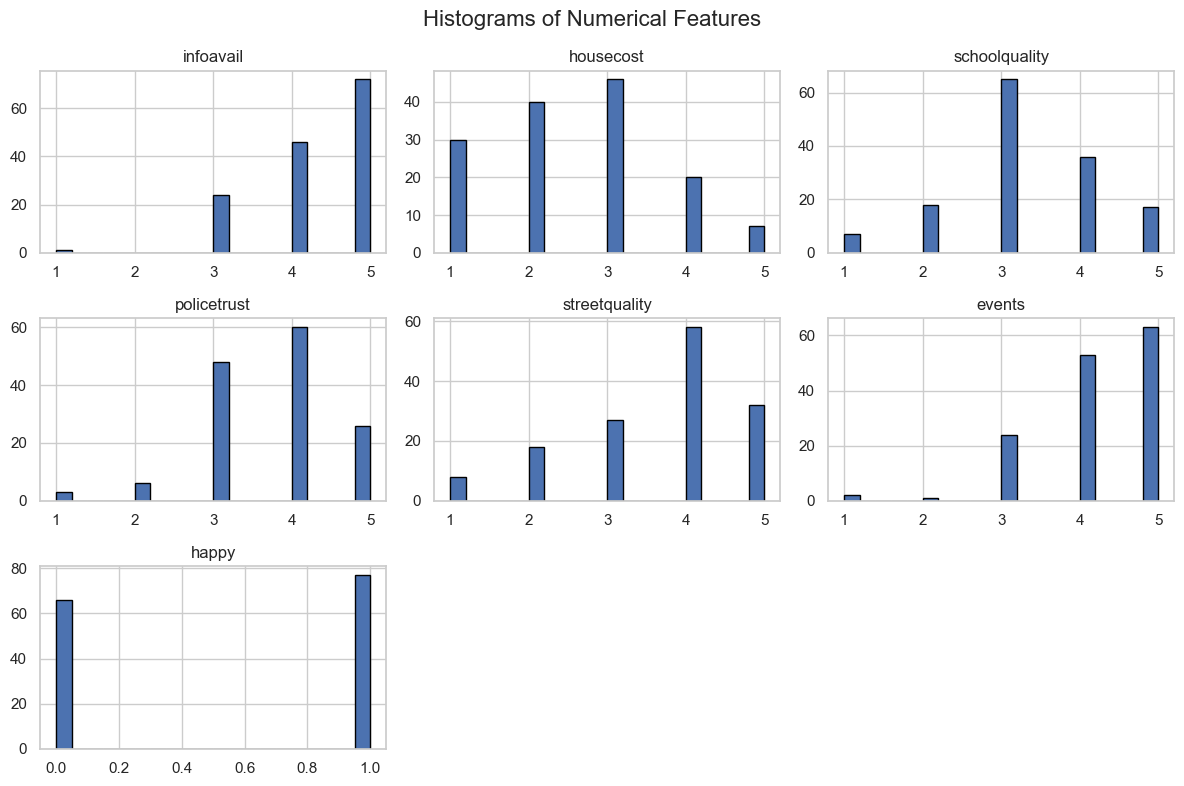

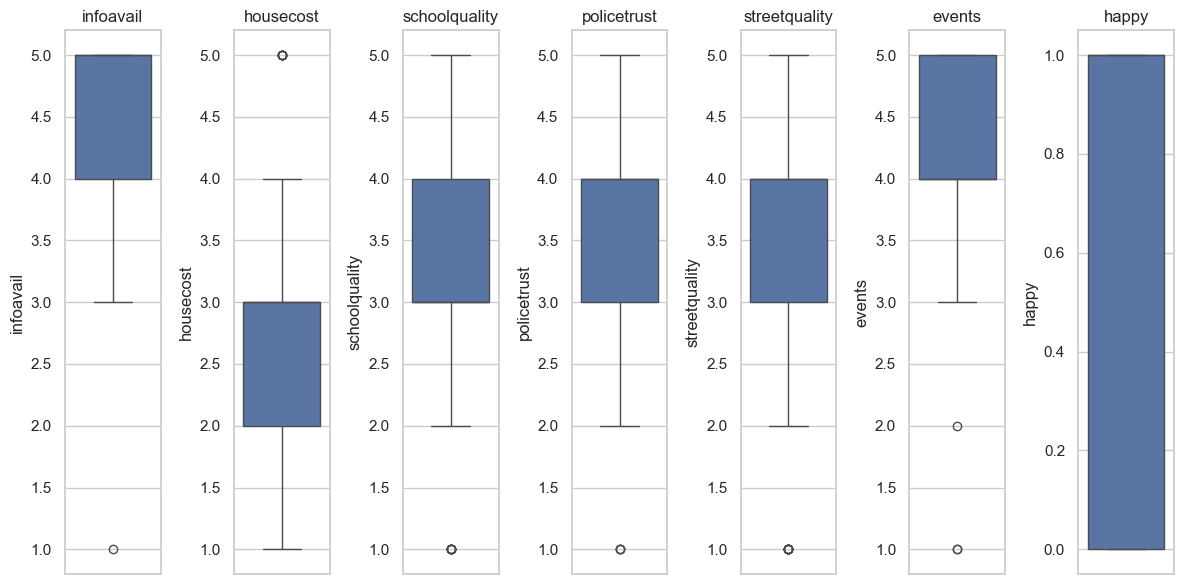

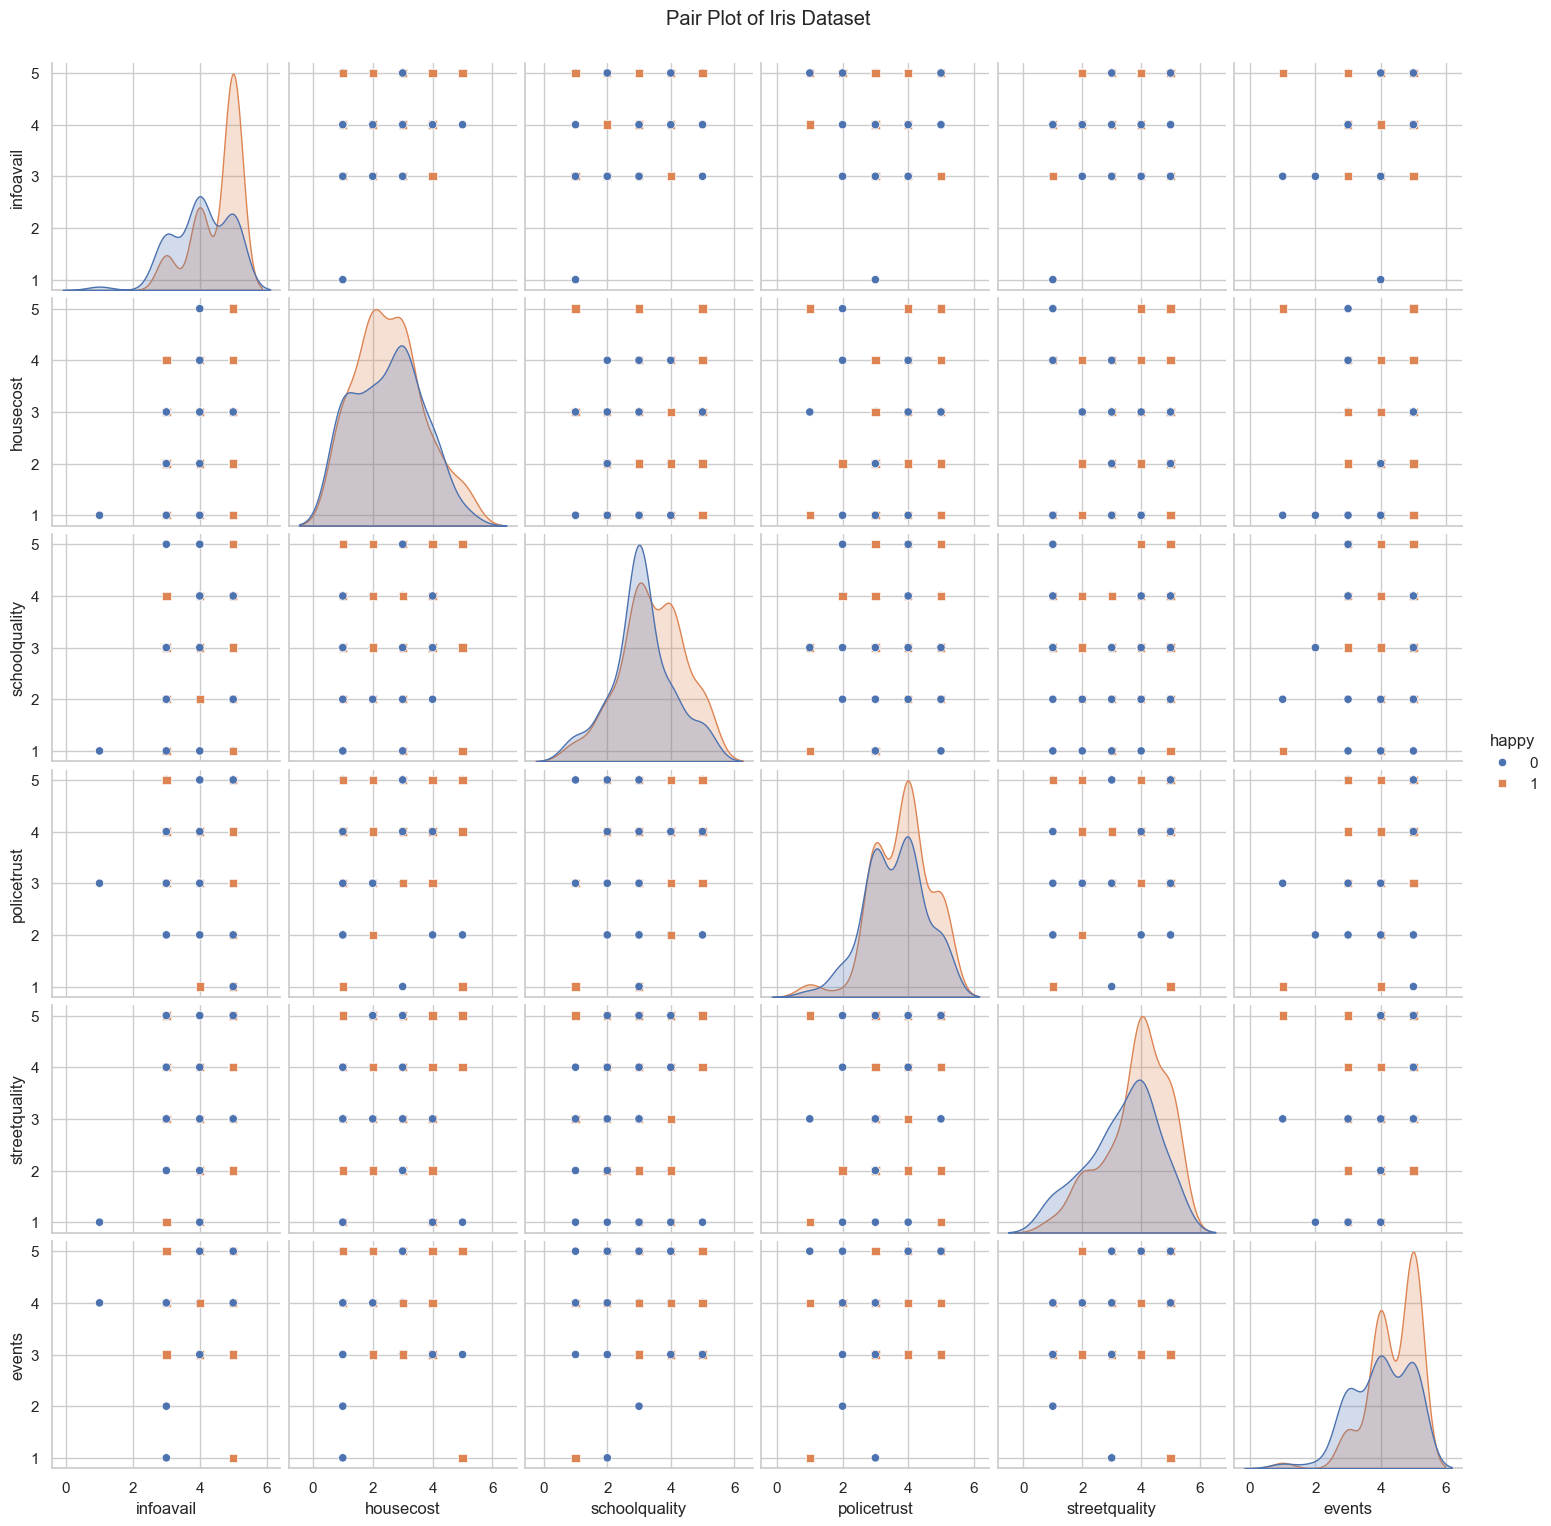

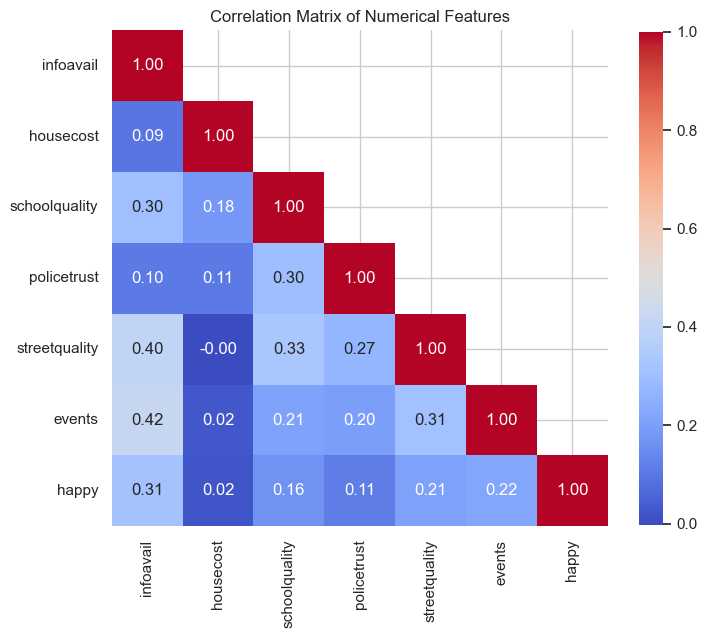

In [48]:
# Plots
# Set style
sns.set_theme(style="whitegrid")

# Plot histograms
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

# Plot box plots
plt.figure(figsize=(12, 6))
for i, col in enumerate(df.columns):
	plt.subplot(1, len(df.columns), i + 1)
	sns.boxplot(y=df[col])
	plt.title(col)
plt.tight_layout()
plt.show()

# Pair plot of all numerical features
sns.pairplot(df, hue='happy', markers=["o", "s"])
plt.suptitle("Pair Plot of Iris Dataset", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 8))
correlation_matrix = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), 1)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", mask=mask, square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [49]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

seed = 123

# Split into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
													y,
													test_size=0.3,
													random_state=seed)

# Define models
models = {
	"GaussianNB": GaussianNB(),
	"LogisticRegression": LogisticRegression(random_state=seed, max_iter=100000),
	"SVC": SVC(probability=True, random_state=seed),
	"DecisionTree": DecisionTreeClassifier(random_state=seed),
	"RandomForest": RandomForestClassifier(random_state=seed),
	"GradientBoosting": GradientBoostingClassifier(random_state=seed),
	"AdaBoost": AdaBoostClassifier(algorithm='SAMME', random_state=seed),
	"XGBoost": XGBClassifier(eval_metric='logloss', random_state=seed)
}

# Store evaluation metrics
results = {
	"Model": [],
	"CV Accuracy": [],
	"Test Accuracy": [],
	"Precision": [],
	"Recall": [],
	"F1 Score": [],
	"ROC AUC": []
}

# Store ROC curves
roc_curves = {}

# Evaluation loop
for name, model in models.items():
	# Cross-validation accuracy
	cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
	cv_accuracy = np.mean(cv_scores)

	# Train and predict
	model.fit(X_train, y_train)
	y_pred = model.predict(X_test)
	y_proba = model.predict_proba(X_test)[:, 1]

	# Metrics
	test_accuracy = accuracy_score(y_test, y_pred)
	precision = precision_score(y_test, y_pred)
	recall = recall_score(y_test, y_pred)
	f1 = f1_score(y_test, y_pred)
	roc_auc = roc_auc_score(y_test, y_proba)

	# Store metrics
	results["Model"].append(name)
	results["CV Accuracy"].append(cv_accuracy)
	results["Test Accuracy"].append(test_accuracy)
	results["Precision"].append(precision)
	results["Recall"].append(recall)
	results["F1 Score"].append(f1)
	results["ROC AUC"].append(roc_auc)

	# ROC curve
	fpr, tpr, _ = roc_curve(y_test, y_proba)
	roc_curves[name] = (fpr, tpr)


In [50]:
# Convert to DataFrame
results_df = pd.DataFrame(results).sort_values(by="ROC AUC", ascending=False)
results_df.reset_index(drop=True, inplace=True)
print(results_df)

                Model  CV Accuracy  Test Accuracy  Precision    Recall  \
0  LogisticRegression         0.61       0.441860   0.400000  0.823529   
1          GaussianNB         0.64       0.418605   0.382353  0.764706   
2            AdaBoost         0.70       0.418605   0.382353  0.764706   
3        RandomForest         0.64       0.465116   0.400000  0.705882   
4             XGBoost         0.65       0.418605   0.375000  0.705882   
5                 SVC         0.66       0.441860   0.400000  0.823529   
6    GradientBoosting         0.61       0.465116   0.400000  0.705882   
7        DecisionTree         0.61       0.418605   0.382353  0.764706   

   F1 Score   ROC AUC  
0  0.538462  0.613122  
1  0.509804  0.599548  
2  0.509804  0.593891  
3  0.510638  0.582579  
4  0.489796  0.547511  
5  0.538462  0.542986  
6  0.510638  0.515837  
7  0.509804  0.478507  


### Conclusions based on the results of comparing classification models:

1. **The overall level of accuracy of the models on the test data is moderate**
 None of the models achieved high classification quality. The maximum accuracy on the test data is only **46.5%** (Random Forest, Gradient Boosting), which indicates the complexity of the task or the potential need for feature engineering, data volume expansion, or hyperparameter tuning.

2. **The highest average accuracy (CV Accuracy) was shown by the AdaBoost model (70%)**, but its generalization ability was insufficient - the accuracy on the test was only 41.86%.

3. **Logistic Regression and SVC demonstrated the best balance between Precision (0.40), Recall (0.82), and F1-measure (0.54)**. The high Recall score is particularly noteworthy, which means that the models are good at identifying the positive class (happy respondents), albeit at the expense of lower accuracy.

4. **Random Forest and Gradient Boosting are the best in terms of Test Accuracy (46.5%)**, but inferior in other metrics, including Recall.

5. **ROC AUC** is a key metric for assessing the model's ability to distinguish between classes:
	* Logistic Regression showed the highest AUC (0.613), which indicates its advantage as the most balanced model for this task.
	* All other models have AUCs below 0.60, indicating a weak ability to classify positive and negative examples.

#### Overall conclusion:

> All models demonstrate rather limited performance in classifying happiness levels based on available features. The most balanced by all metrics are **Logistic Regression** and **SVC**, while **Random Forest** and **Gradient Boosting** provide the highest overall accuracy. To improve the results, it is advisable to consider feature engineering, hyperparameter selection, and data volume expansion.

In [51]:
# Hyperparameter Optimization for LogisticRegression
# Define hyperparameter grid
param_grid = [
	{
		'penalty': ['l1'],
		'C': [0.01, 0.1, 1, 10, 100],
		'solver': ['liblinear', 'saga']
	},
	{
		'penalty': ['l2'],
		'C': [0.01, 0.1, 1, 10, 100],
		'solver': ['liblinear', 'saga']
	},
	{
		'penalty': ['elasticnet'],
		'C': [0.01, 0.1, 1, 10],
		'solver': ['saga'],
		'l1_ratio': [0.25, 0.5, 0.75]
	}
]

# Initialize Logistic Regression
lr = LogisticRegression(random_state=seed, max_iter=100000)

# Set up GridSearchCV
grid_search = GridSearchCV(
	estimator=LogisticRegression(random_state=seed, max_iter=100000),
	param_grid=param_grid,
	scoring='roc_auc',
	cv=5,
	n_jobs=-1,
	verbose=1
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best estimator
best_lr = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

models["Optimized LogisticRegression"] = best_lr

# Predict and evaluate
y_pred = best_lr.predict(X_test)
y_proba = best_lr.predict_proba(X_test)[:, 1]

# Compute metrics
test_accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_curves["Optimized LogisticRegression"] = (fpr, tpr)

# Store metrics
results["Model"].append("Optimized LogisticRegression")
results["CV Accuracy"].append(None)
results["Test Accuracy"].append(test_accuracy)
results["Precision"].append(precision)
results["Recall"].append(recall)
results["F1 Score"].append(f1)
results["ROC AUC"].append(roc_auc)

print(f"Optimized LogisticRegression:")
print(f"Test Accuracy: {test_accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Optimized LogisticRegression:
Test Accuracy: 0.535
Precision: 0.452
Recall: 0.824
F1 Score: 0.583
ROC AUC: 0.624


                          Model  CV Accuracy  Test Accuracy  Precision  \
0  Optimized LogisticRegression          NaN       0.534884   0.451613   
1            LogisticRegression         0.61       0.441860   0.400000   
2                    GaussianNB         0.64       0.418605   0.382353   
3                      AdaBoost         0.70       0.418605   0.382353   
4                  RandomForest         0.64       0.465116   0.400000   
5                       XGBoost         0.65       0.418605   0.375000   
6                           SVC         0.66       0.441860   0.400000   
7              GradientBoosting         0.61       0.465116   0.400000   
8                  DecisionTree         0.61       0.418605   0.382353   

     Recall  F1 Score   ROC AUC  
0  0.823529  0.583333  0.624434  
1  0.823529  0.538462  0.613122  
2  0.764706  0.509804  0.599548  
3  0.764706  0.509804  0.593891  
4  0.705882  0.510638  0.582579  
5  0.705882  0.489796  0.547511  
6  0.823529  0.538462

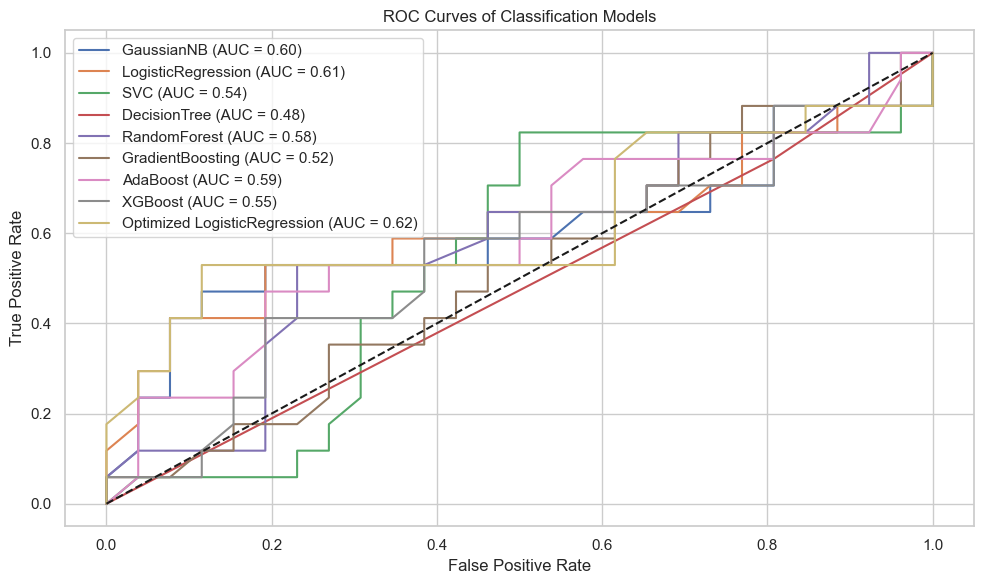

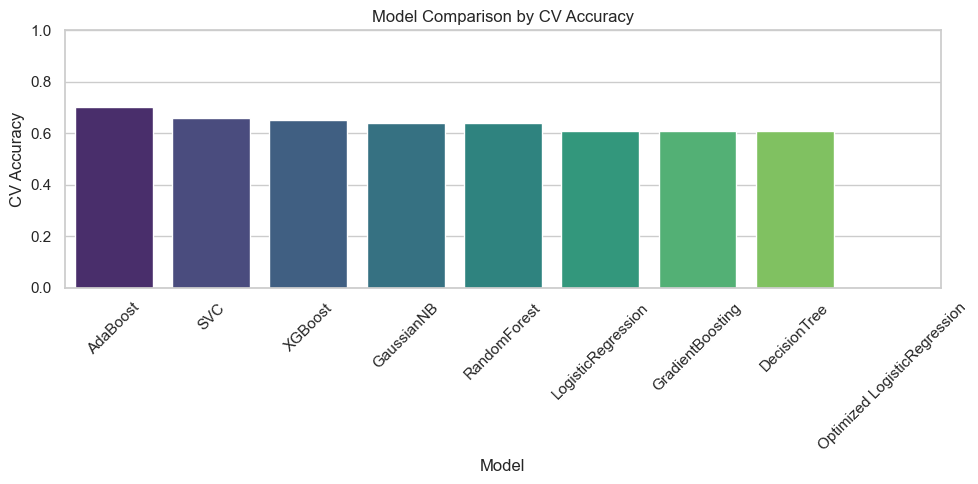

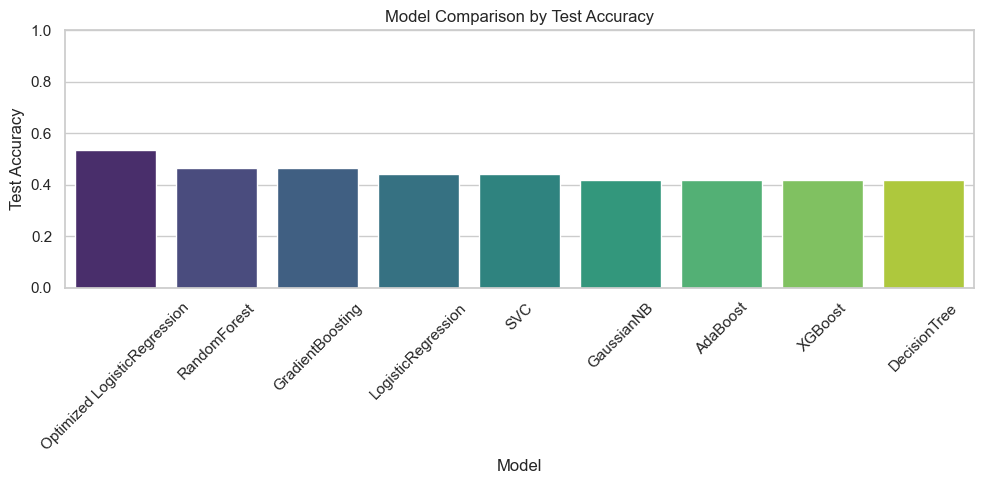

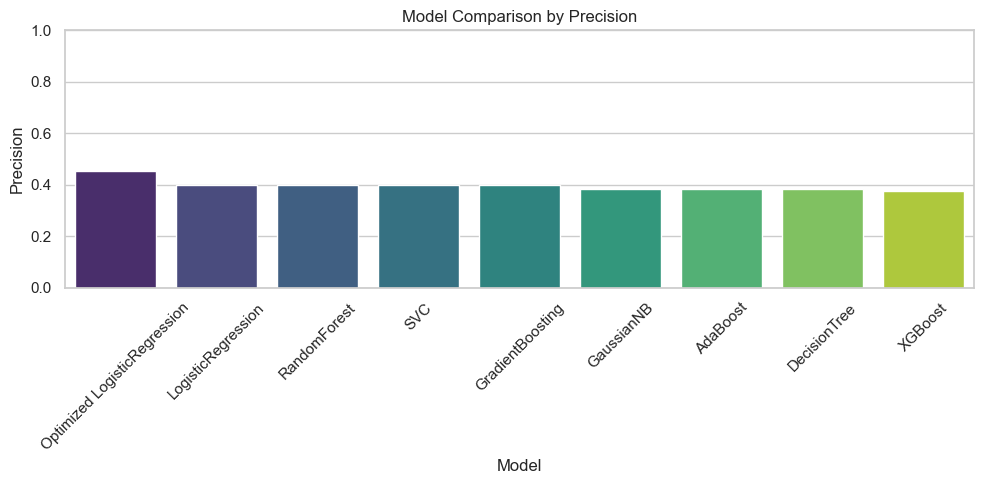

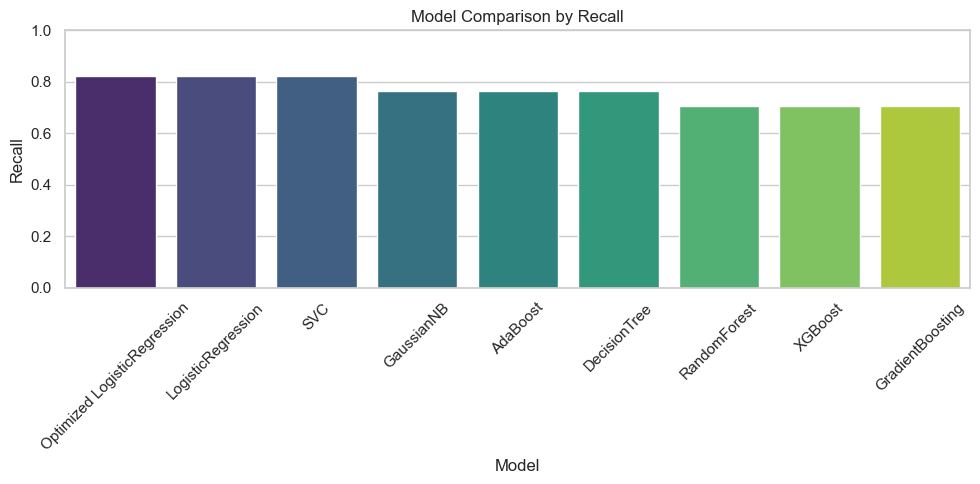

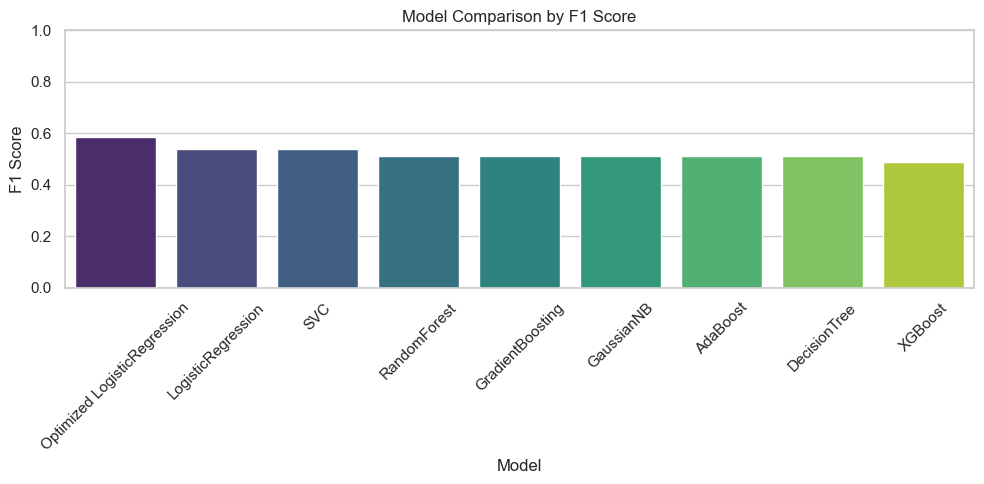

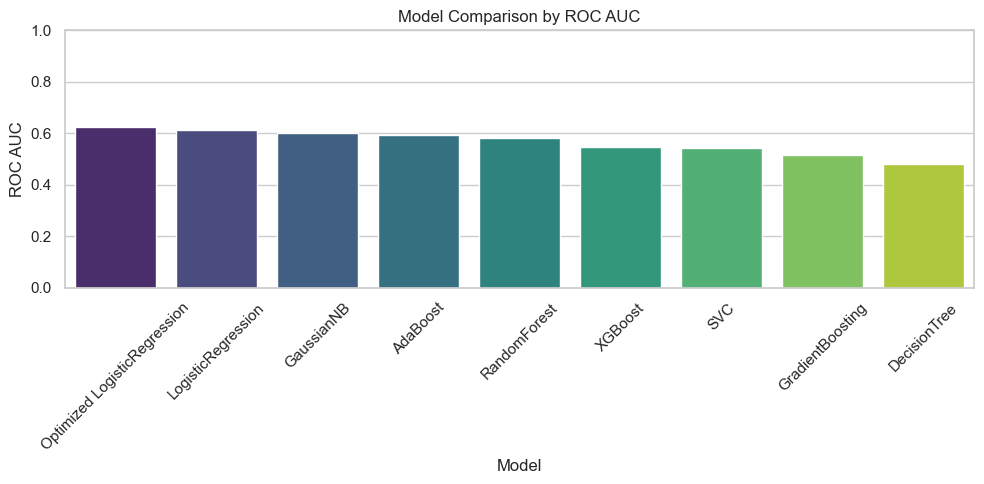

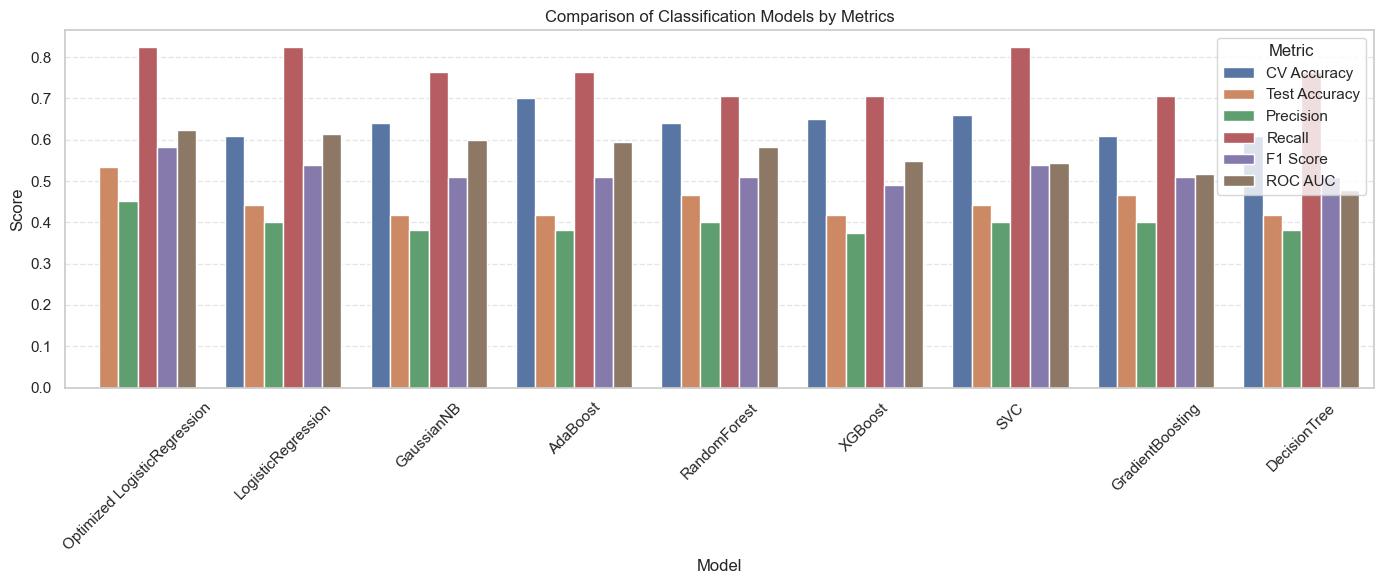

In [52]:
# Convert to DataFrame
results_df = pd.DataFrame(results).sort_values(by="ROC AUC", ascending=False)
results_df.reset_index(drop=True, inplace=True)
print(results_df)

metrics_to_plot = ['CV Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

# Set style
sns.set_theme(style="whitegrid")

# Plot ROC curves
plt.figure(figsize=(10, 6))
for name, (fpr, tpr) in roc_curves.items():
	plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, models[name].predict_proba(X_test)[:,1]):.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curves of Classification Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot barplot
for metric in metrics_to_plot:
	plt.figure(figsize=(10, 5))
	sorted_df = results_df.sort_values(by=metric, ascending=False)
	sns.barplot(data=sorted_df, x='Model', y=metric, palette='viridis', hue='Model', legend=False)
	plt.title(f'Model Comparison by {metric}')
	plt.ylabel(metric)
	plt.xlabel('Model')
	plt.xticks(rotation=45)
	plt.ylim(0, 1)
	plt.tight_layout()
	plt.show()

# Plot predictions for each model
# Converting DataFrame from wide to long format for Seaborn
df_long = results_df.melt(id_vars='Model', value_vars=metrics_to_plot,
						  var_name='Metric', value_name='Score')

plt.figure(figsize=(14, 6))
sns.barplot(data=df_long, x='Model', y='Score', hue='Metric')

plt.title('Comparison of Classification Models by Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Comparative analysis of **Optimized Logistic Regression**:

#### 1. **ROC AUC** (the main metric that was optimized)

**Optimized LogisticRegression**: 0.624 - highest score
* Other models:
  * LogisticRegression: 0.613
  * GaussianNB: 0.599
  * AdaBoost: 0.593
  * RandomForest: 0.583
  * XGBoost: 0.547
  * SVC: 0.543
  * GradientBoosting: 0.516
  * DecisionTree: 0.479

**Conclusion: The optimized model has the best ability to distinguish between classes.

#### 2. **Recall** (completeness - how well the model detects the positive class)

** **Optimized LogisticRegression**: 0.824 - the highest score of all
* Other models: mostly in the range of 0.705 to 0.823

**Conclusion**: The model is very good at detecting the positive class, which can be important in tasks with high missed value.

#### 3. **Precision** (accuracy - the proportion of correctly classified positive cases)

* Optimized Logistic Regression: 0.452
* All other models: in the range from 0.375 to 0.4

**Conclusion**: The optimized model has the highest accuracy, although the overall level of accuracy across all models is moderate.

#### 4. **F1 Score** (average between accuracy and completeness)

* Optimized Logistic Regression: 0.583
* Other models: the highest is LogisticRegression (0.538)

**Conclusion**: The optimized model balances recall and precision the best.

#### 5. **Test Accuracy**.

* Optimized LogisticRegression: 0.535
* Next best: RandomForest and GradientBoosting - 0.465

**Conclusion: The optimized model has the highest accuracy on the test set.

#### Overall conclusion.

The **Optimized LogisticRegression** outperforms the other models in almost all key metrics, especially in:

* ability to discriminate between classes (ROC AUC),
* detection of a positive class (Recall)
* balance between precision and recall (F1 Score),
* overall accuracy on the test.